In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
og_df = df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.shape)

(891, 12)


In [4]:
df = df.loc[df['Age'] < 18]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [5]:
df = df.drop(['Ticket', 'Fare', 'Cabin', 'Name', 'PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
7,0,3,male,2.0,3,1,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S
14,0,3,female,14.0,0,0,S
16,0,3,male,2.0,4,1,Q
...,...,...,...,...,...,...,...
850,0,3,male,4.0,4,2,S
852,0,3,female,9.0,1,1,C
853,1,1,female,16.0,0,1,S
869,1,3,male,4.0,1,1,S


In [6]:
print(df.shape)

(113, 7)


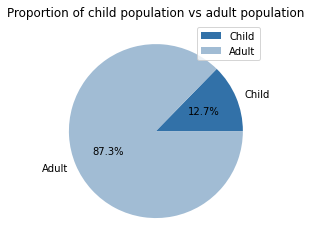

In [7]:
#child vs adult population
child = df.shape[0]/og_df.shape[0] * 100
adult = (og_df.shape[0] - df.shape[0])/og_df.shape[0] * 100
y = np.array([child, adult])
plt.pie(y, labels=['Child', 'Adult'], autopct='%1.1f%%', colors = ['#3271a8', '#a1bcd4'])
plt.legend()
plt.title('Proportion of child population vs adult population')
plt.show()

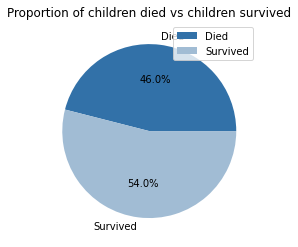

In [8]:
#death vs survived
df_child_died = df.loc[df['Survived'] == 0]
df_child_survived = df.loc[df['Survived'] == 1]
child_died = df_child_died.shape[0]/df.shape[0] * 100
child_survived = df_child_survived.shape[0]/df.shape[0] * 100

y = np.array([child_died, child_survived])
plt.pie(y, labels=['Died', 'Survived'], autopct='%1.1f%%', colors = ['#3271a8', '#a1bcd4'])
plt.legend()
plt.title('Proportion of children died vs children survived')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

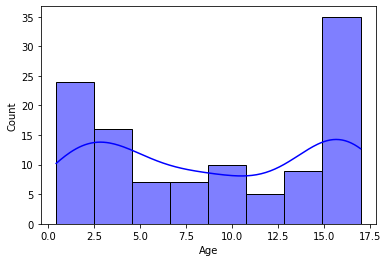

In [9]:
#age distribution
import seaborn as sns

age = df['Age']
sns.histplot(data=age, kde=True, color='blue')

In [27]:
mean = df['Age'].mean()
median = df['Age'].median()
print(f'Avg age {mean}')
print(f'Median age {median}')

Avg age 9.04132743362832
Median age 9.0


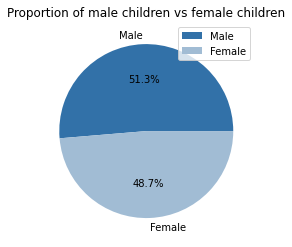

In [14]:
#sex distribution
df_male = df.loc[df['Sex'] == 'male']
df_female = df.loc[df['Sex'] == 'female']
male = df_male.shape[0]/df.shape[0] * 100
female = df_female.shape[0]/df.shape[0] * 100

y = np.array([male, female])
plt.pie(y, labels=['Male', 'Female'], autopct='%1.1f%%', colors = ['#3271a8', '#a1bcd4'])
plt.legend()
plt.title('Proportion of male children vs female children')
plt.show()

[Text(0, 0, '82'), Text(0, 0, '24'), Text(0, 0, '7')]

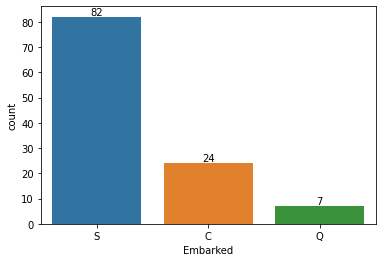

In [13]:
#port distribution
ax = sns.countplot(data=df, x='Embarked')
ax.bar_label(ax.containers[0])

<AxesSubplot: xlabel='FamilySize', ylabel='Count'>

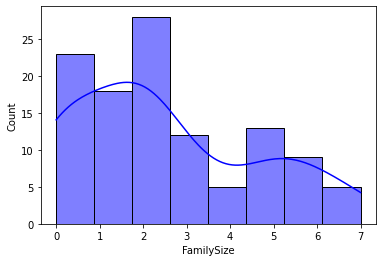

In [18]:
#family size distribution
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.histplot(data=df['FamilySize'], kde=True, color='blue')

In [26]:
mean = df['FamilySize'].mean()
median = df['FamilySize'].median()
print(f'Avg family size {mean}')
print(f'Median family size {median}')

Avg family size 2.5132743362831858
Median family size 2.0


<AxesSubplot: xlabel='Embarked', ylabel='count'>

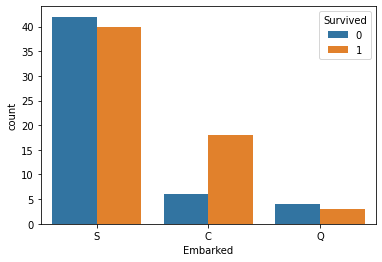

In [32]:
sns.countplot(data=df, x='Embarked', hue='Survived')